# データ分析演習 week09 演習課題
- 氏名：<氏名に置き換えてください>
- 学生番号：<学生番号に置き換えてください>

## はじめに

1. このファイルの名前の(JBxxxxxx)を自分の学生番号にしてください．
2. 上記の氏名と学生番号を忘れずに記入してください．

## 提出方法

- GitHub Desktopを通じてGitHubへ提出
- 締切: **7月1日（木）**
  - 遅れる場合はできるだけ早く提出してください．7月8日（木）14:30 を超える場合は連絡してください．

## この演習資料の進め方

1. 教科書「東京大学のデータサインティスト育成講座」 3.1（3章1節）〜 3.4（3章4節），および教科書サポートページからダウンロードしたノートブック（Chapter3.ipynb）を参考にしてください．一通り学習しておくのをお勧めします．
 - サポートサイト: https://book.mynavi.jp/supportsite/detail/9784839965259.html
 - パスワードは書籍に記載してあります．
2. その後，教科書を参考にしながら以下の演習課題を解いてください
 - なんかよく分からないエラーが起こったら，一旦Jupyter notebookのメニューの Kernel -> Restart & Clear Outputを実行し一回初期化して，再度上からセルを実行すると解決することもあります．
---

## （重要）教科書の訂正と補足

### NumpyとPandasによる分散と標準偏差

オプションを指定しない場合（デフォルトで）：

- Numpy の `var()` や `std()` は不偏でない分散，標準偏差を返します ($n$で割る方)．
    - しかし Numpy の `cov()` は不偏共分散を返します．（$\leftarrow$ ここがややこしい）
- Pandas は，基本的には R と同じく，不偏分散やそこから平方根で計算される標準偏差などを返します ($n-1$で割る方)．
    - したがって `var()`, `std()`, `cov()`, `describe()`などで表示されるのは，不偏分散や，不偏分散平方根です．
    
以下のコードで，実際に試してみます．$n=3$で，分散は$n$で割れば$\frac{2}{3}$，$n-1$で割れば$\frac{2}{2} = 1$になります．

In [1]:
import numpy as np
import pandas as pd

# デフォルト動作
print('----- Numpy default -----')
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
print('numpy var():', np.var(x))
print('numpy std():', np.std(x))
print('numpy cov():\n', np.cov(x, y))

print('\n----- Pandas default -----')
df_xy = pd.DataFrame({'x': x, 'y': y})
print('pandas var():', df_xy['x'].var())
print('pandas std():', df_xy['x'].std())
print('pandas cov():\n', df_xy.cov())
print('pandas describe()\n:', df_xy.describe())

----- Numpy default -----
numpy var(): 0.6666666666666666
numpy std(): 0.816496580927726
numpy cov():
 [[ 1. -1.]
 [-1.  1.]]

----- Pandas default -----
pandas var(): 1.0
pandas std(): 1.0
pandas cov():
      x    y
x  1.0 -1.0
y -1.0  1.0
pandas describe()
:          x    y
count  3.0  3.0
mean   2.0  2.0
std    1.0  1.0
min    1.0  1.0
25%    1.5  1.5
50%    2.0  2.0
75%    2.5  2.5
max    3.0  3.0


### 教科書の訂正

**教科書の式3-3-1, 3-3-2, 3-3-4は $n$ で割っていますが，（第7版までの）教科書のコードだと $n-1$ で割った方が求まるため，誤りです．**

**教科書第8版では，式ではなくコードの方がいくつか修正されているようです．**

https://book.mynavi.jp/supportsite/detail/9784839965259.html

- p.80: `student_data_math['absences'].var()` $\rightarrow$ `student_data_math['absences'].var(ddof=0)` （出力値も変更必要）
- p.81: `student_data_math['absences'].std()` $\rightarrow$ `student_data_math['absences'].std(ddof=0)` （出力値も変更必要）

**ただし，np.cov なども含め，もう少し修正が必要な箇所があります．**

- p.81: `np.sqrt(student_data_math['absences'].var())` $\rightarrow$ `np.sqrt(student_data_math['absences'].var(ddof=0))` （出力値も変更必要）
- p.81: `describe()` の補足：このメソッドで求まる標準偏差 `std` は不偏分散の平方根（n-1で割る方）です．式3-3-3とは異なるので注意．`describe()` には `ddof`のオプションが指定できません．
- p.81 ch.3-3-4-1 のタイトル: 四方位範囲を求める $\rightarrow$ 四分位範囲を求める
- p.81: 変動係数の計算用コードにて `student_data_math['absences'].std()` $\rightarrow$ `student_data_math['absences'].std(ddof=0)` （出力値も変更必要）
- p.82: `student_data_math.std()` $\rightarrow$ `student_data_math.std(ddof=0)` （出力値も変更必要）
- p.86: `np.cov(student_data_math['G1'], student_data_math['G3'])` $\rightarrow$ `np.cov(student_data_math['G1'], student_data_math['G3'], ddof=0)`  （出力値，および「結果の行列の意味は・・」以下の値を変更必要）
- p.86: `student_data_math['G1'].var()` $\rightarrow$ `student_data_math['G1'].var(ddof=0)` （出力値も変更必要）
- p.86: `student_data_math['G3'].var()` $\rightarrow$ `student_data_math['G3'].var(ddof=0)` （出力値も変更必要）

### 結局どうすればよいか

このように，教科書であっても，分散が不偏かどうかで間違っているケースがあります．したがって，少なくとも Numpy で `var()`, `std()`, `cov()` を使うときは，以下のように **明示的に引数で `ddof=0` か `ddof=1` のどちらかを指定** することをお勧めします．
**分散は $n-\text{ddof}$ で割って計算されます．**

一方で，Pandas は Rと同じく不偏分散で統一しているようなので，混乱は少ないと思います．ただし間違いが減らすために，ddofを指定すると分かりやすいかも．もしくは，コメントに`# 不偏分散を計算` のように一言入れておくのもありでしょう．

In [2]:
# Numpy
print('----- Numpy biased (nで割る) -----')
print('numpy var():', np.var(x, ddof=0))
print('numpy std():', np.std(x, ddof=0))
print('numpy cov():\n', np.cov(x, y, ddof=0))

print('----- Numpy unbiased (n-1で割る) -----')
print('numpy var():', np.var(x, ddof=1))
print('numpy std():', np.std(x, ddof=1))
print('numpy cov():\n', np.cov(x, y, ddof=1))

----- Numpy biased (nで割る) -----
numpy var(): 0.6666666666666666
numpy std(): 0.816496580927726
numpy cov():
 [[ 0.66666667 -0.66666667]
 [-0.66666667  0.66666667]]
----- Numpy unbiased (n-1で割る) -----
numpy var(): 1.0
numpy std(): 1.0
numpy cov():
 [[ 1. -1.]
 [-1.  1.]]


In [3]:
# Pandas
print('----- Pandas biased (nで割る) -----')
print('pandas var():', df_xy['x'].var(ddof=0))
print('pandas std():', df_xy['x'].std(ddof=0))

print('\n----- Pandas unbiased (n-1で割る) defaultこちら -----')
print('pandas var():', df_xy['x'].var(ddof=1))
print('pandas std():', df_xy['x'].std(ddof=1))
# Pandas の describe() や cov() は常に不偏分散

----- Pandas biased (nで割る) -----
pandas var(): 0.6666666666666666
pandas std(): 0.816496580927726

----- Pandas unbiased (n-1で割る) defaultこちら -----
pandas var(): 1.0
pandas std(): 1.0


## ここから演習課題

[ここにコードを書く] と書かれた箇所を修正して，セルを完成させていってください．

### 準備1 モジュールのインポート (教科書 ch.3.1)

まずは，この演習で使うモジュールをインポートしておきます．インポートについては，教科書ch3.1.2も参照してください．

In [4]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn import linear_model  # 単回帰分析で利用
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

'%.3f'

### 準備2 ファイルダウンロードと展開 (教科書 ch.3.2.1)

これまでの Excel や R の回では，UCI Machine Learning Repository にあるデータ https://archive.ics.uci.edu/ml/datasets/Student+Performance の一部を使っていました．このリポジトリは講義でも何度か紹介していますが，統計や機械学習でよく使われるデータが共有されており，ダウンロードすることができます．
 - 教科書では，Wine（ワインの成分や品質）など他のデータも利用されています．
 - UCI は，カリフォルニア大学アーバイン校 (University of California, Irvine) の略です（大学のマスコットはオオアリクイ）．
 - 各データの提供主は様々で，今から利用するデータはポルトガルの大学が共有したものです．（だから数学とポルトガル語の成績データ）

では教科書の方法を参考にデータをダウンロードしてみましょう．その前に，今いる場所を見ておきましょう．`pwd` は Python の関数ではなく，シェルスクリプトのコマンドの一つです．print working directory の略で，作業ディレクトリ（今いるフォルダ，カレントディレクトリと呼ばれることも多い）を表示します．

In [5]:
pwd

'/Users/tyamamot/Dropbox/Documents/docs/2020/Lectures/DataAnalysisPractice/git/materials/weeek09'

教科書ではフォルダを新たに作成 (`mkdir`) し，移動 (`cd`) していますが，この演習ではフォルダ `data` の作成だけ行って，あとは相対パスを使ってファイルを指定しましょう．

In [6]:
mkdir data

ちなみにこの `mkdir` もシェルのコマンドです．Python でもフォルダを作成する関数がありますが，それは各自調べてみてください．では，このフォルダの中を見てみましょう．ファイルエクスプローラーからも確認してみるとよいでしょう．空っぽのはずです．

In [7]:
ls data

0 個のファイルになっているでしょうか．一方，2個のディレクトリ（フォルダ）となっていますが，`.` は今いるディレクトリ，`..`は一つ上のディレクトリのことですので，実質的にこの data フォルダは空っぽです．

さて，zipファイルをダウンロードし，展開するところまでをPythonのプログラムで行います．この ipynb ファイルと同じ場所，つまり上の `pwd` で表示されたフォルダにダウンロードし，展開先を `data` にします．教科書では，新たに作成したフォルダに作業ディレクトリを移動していますが，この演習では作業ディレクトリは変更しません．

In [8]:
import requests, zipfile  # webからデータを取得したり、zipファイルを扱うためのライブラリ
from io import StringIO
import io

# データがあるurlの指定
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('data')  # ここが教科書と違います．展開先のフォルダを指定しています．

さて，もう一度 `data` の中身を確認してみましょう．展開されたファイルが表示されるでしょうか．ファイルエクスプローラーでも確認してみましょう．

In [9]:
ls data

student-mat.csv  student-merge.R  student-por.csv  student.txt


ダウンロードしたzipファイル自体はどこへいったの？と思うかもしれませんが，上のコードでは，zipファイルを保存せず，メモリ上でファイルとして開いて展開しています．`io.BytesIO()` は，メモリ上にあるファイルをあたかもストレージ(HDDやSSD)にあるファイルのように開く際にしばしば使います．

### 課題1 ファイルの読み込みと要約 (教科書 ch.3.2.2)

student-mat.csv を df という名前のデータフレームとして読み込み，dfの内容（各列のはじめの5行と要約統計量）を表示する．

課題1-1. `pd.read_csv()` にてファイルを相対パス `'data/student-mat.csv'` で指定して df へデータを読み込みなさい．
 - セパレータがカンマ`,`ではなくセミコロン`;`なので `sep=';'` が必要（セミコロンを文字として指定するのでシングルクォートで挟むのを忘れずに）

課題1-2. df のはじめの5行を表示せよ．（`head()` を利用する）

課題1-3. df の要約統計量を表示せよ．（`describe()` を利用する）

In [10]:
df = pd.read_csv('data/student-mat.csv', sep=';')  # 1-1. df へデータを読み込む
df.head()  # 1-2. dfの最初の方の行を表示

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df.describe()  # 1-3. dfの各列の要約統計量を表示 (stdは不偏分散の平方根です)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 課題2 データフレームの各列の型 (教科書 ch.3.2.3 および ch.2.4の復習)

データフレーム df の各列の型や情報を表示する．

課題2-1. dfの各列の型を確認せよ．データフレームの全列の型情報は `データフレーム名.dtypes` で一度に取得することができる．

- 各列の型が `int64` であれば各要素は64bit整数，`object` であればこの場合は各要素が文字列である（文字列以外の場合もある）．

課題2-2. 列'studytime'の型のみを表示せよ．ある一つの列の型を確認するには，`データフレーム名['列名'].dtype` で確認することができる

- `データフレーム名['列名']` で，指定した列が Series として取り出される．
- DataFrameではdtypesで全列の型を一度に取得，Seriesではdtypeでひとつの列の型を取得できる．

課題2-3. `object`型と表示された列'school'について，各要素の型も確認せよ．

- `type(データフレーム名['列名'][0])` のように一つ目の要素を確認できる．
- この `type()` をある列(Series)の全要素に一度に適用するには，`データフレーム名['列名'].map(type)` のように書くことができる（次週の先取り）．

課題2-4. `info()` を用いて各列の情報を表示せよ．

課題2-5. 調べた情報をまとめよ．

In [12]:
df.dtypes  # 2-1. dtypes でDataFrameの各列の型情報を一度に表示

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [13]:
df['studytime'].dtype  # 2-2. dtype でSeries(一つの列)の型を表示

dtype('int64')

In [14]:
type(df['school'][0])  # これだと一つ目の要素の型を取得できる（実行してみよう）
df['school'].map(type)  # 2-3. 列'school'に対して map(type) で各要素の型を表示 (詳しくは次週)

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
390    <class 'str'>
391    <class 'str'>
392    <class 'str'>
393    <class 'str'>
394    <class 'str'>
Name: school, Length: 395, dtype: object

In [15]:
df.info()  # 2-4. info() を用いてデータフレームの情報を表示（行数など，型情報以外も取得できる）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### 課題2-5 はここに記述すること

データフレーム df の情報

- 行数: 
- 列数: 
- 列'studytime'の型: 

### 課題3 条件判定と列の追加 (教科書 ch.2.4.5の復習)

Excelの演習と同様に，以下の traveltime, studytime の列を使って，isfar (通学時間が30分以上か否か), homestudy (週の学習時間が5時間以上か否か) を新たな列として追加する．

- traveltime - 通学時間: 1 (<15 min.), 2 (15 to 30 min.), 3 (30 min. to 1 hour),  4 (>1 hour)
- studytime - 週の学習時間: 1 (<2 hours), 2 (2 to 5 hours), 3 (5 to 10 hours), 4 (>10 hours)

課題3-1. 列 traveltime を用いて，通学時間が30分以上をTrue，30分未満をFalseとするような新たな列 isfar を追加せよ．
- `df['traveltime'] >= 数値` のようにすると，列 traveltime の各要素に対して一度に「数値」との大小関係を判定でき，True / False を要素とするような Series として取得できる．
- `df['isfar'] = 新たに作成したSeries` で新たな列 isfar をデータフレームdfへ追加できる．
- 列 traveltime に入っている数値は通学時間（分）そのものではないことに注意

課題3-2. 列 studytime を用いて，週の学習時間が5時間以上をTrue，5時間未満をFalseとするような新たな列 homestudy を追加せよ．
- 列 studytime に入っている数値は学習時間（時間）そのものではないことに注意

In [16]:
# 課題3-1
df['traveltime'] >= 3  # いったんこれを実行してみよう
df['isfar'] = df['traveltime'] >= 3  # 3-1. 'isfar'という名前の列として追加
df['isfar'] # df['isfar'] を表示

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393     True
394    False
Name: isfar, Length: 395, dtype: bool

In [17]:
# 課題3-2
df['homestudy'] = df['studytime'] >= 3  # 3-2. 列'homestudy'を追加
df['homestudy']  # df['homestudy'] を表示

0      False
1      False
2      False
3       True
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Name: homestudy, Length: 395, dtype: bool

### 課題4 量的変数vs量的変数（散布図や回帰）

列 G1, G2, G3 はいずれも量的変数（量的データ）である．平均値などの統計量，ヒストグラムや散布図の表示，回帰分析を行ってみる．

課題4-1. G1の平均値，分散と標準偏差（nで割る方），中央値，ヒストグラムを表示せよ．

- 分散と標準偏差では ddof=0 を引数に与えること．

課題4-2. G1とG3の共分散行列（nで割る方），相関係数，およびG1を横軸，G3を縦軸とする散布図を表示せよ．

- 共分散行列では numpy の cov() 用いるものとし，ddof=0 を引数に与えること．
- 相関係数では scipy の stats.pearsonr を用い，その第一要素を取り出して表示する．
- 散布図は課題4-4でも使うので，自作の関数にする．

課題4-3. G1, G2, G3 の散布図行列を表示せよ．

- `sns.pairplot(データフレーム)` を用いる．引数で渡すデータフレームは，G1, G2, G3列だけ取り出したものとする．

課題4-4. G1を説明変数，G3を目的変数とする回帰分析を行い，切片，傾き，決定係数を表示せよ．

- scikit learn の LinearRegression を利用する．
- 説明変数は行列の形で（一般には重回帰のように複数の変数を与えるため．今回は1列だけなので $n \times 1$ の行列になる）．
    - `df[['G1']]` とすればよい（`データフレーム名[列のリスト]` だとデータフレームの一部が再び DataFrame として取り出せるため）
- 目的変数はベクトルの形で．
    - df['G3'].values のように `.values` を付けると numpy の ndarray として取り出せるが，付けなくてもよい．説明変数の方も `.values`はなくてもよい

課題4-5. 課題4-2と同様の散布図を表示し，その上に課題4-4の結果を使って回帰直線を表示せよ．

G1の平均値 =  10.90886075949367
G1の分散(nで割る方) =  10.989161993270304
G1の標準偏差(標本分散の平方根) =  3.314990496708898
G1の中央値 =  11.0


Text(0, 0.5, 'Frequency')

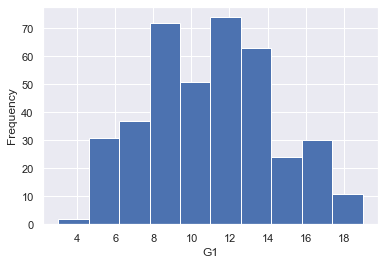

In [18]:
# 課題4-1
print('G1の平均値 = ', df['G1'].mean())  # 平均値
print('G1の分散(nで割る方) = ', df['G1'].var(ddof=0))  # 標本分散 (ddofを設定すること)
print('G1の標準偏差(標本分散の平方根) = ', df['G1'].std(ddof=0))  # 標準偏差 (ddofを設定すること)
print('G1の中央値 = ', df['G1'].median())  # 中央値
plt.hist(df['G1'])  # G1のヒストグラムを表示
plt.xlabel('G1')  # 横軸ラベルに 'G1' を設定
plt.ylabel('Frequency')  # 縦軸ラベルに 'Frequency' を設定

G1とG3の共分散行列:
 [[10.989 12.157]
 [12.157 20.936]]
G1とG3の相関係数:  0.801467932017414


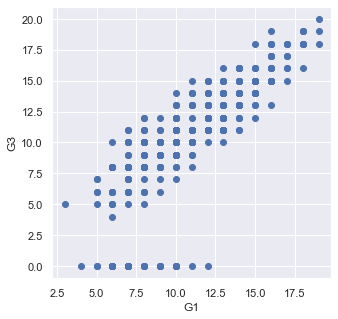

In [19]:
# 課題4-2
print('G1とG3の共分散行列:\n', np.cov(df['G1'], df['G3'], ddof=0))  # 共分散行列 (ddofを設定すること)
print('G1とG3の相関係数: ', sp.stats.pearsonr(df['G1'], df['G3'])[0])  # ピアソンの積率相関係数

# 散布図プロットを関数にしておく（再利用するので）
def scatterplot(df):
    """ 散布図をプロットする関数 """
    plt.figure(figsize=(5, 5))  # サイズを指定（縦横比を1:1に）
    plt.plot(df['G1'], df['G3'], 'o')  # 散布図をプロット
    plt.xlabel('G1')  # 横軸ラベルに 'G1' を設定
    plt.ylabel('G3')  # 縦軸ラベルに 'G3' を設定
    
scatterplot(df)  # 関数を呼び出す

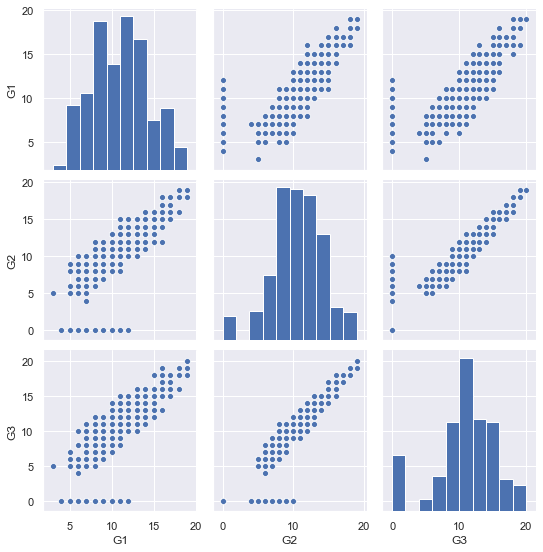

In [20]:
# 課題4-3
lst = ['G1', 'G2', 'G3']  # リストを変数lstへ
sns.pairplot(df[lst])  # リストlstを指定して散布図行列を表示

In [21]:
# 課題4-4
X = df[['G1']]  # こちらは行列の形にする必要がある
y = df['G3']  # こちらはベクトルなので分かりやすく小文字yにする
reg = linear_model.LinearRegression()  # 線形モデルを準備
reg.fit(X, y)  # 線形モデルをデータにfitさせる（パラメタを推定する）
print('切片: ', reg.intercept_)
print('回帰係数', reg.coef_)
print('決定係数', reg.score(X, y))

切片:  -1.6528038288004616
回帰係数 [1.106]
決定係数 0.64235084605227


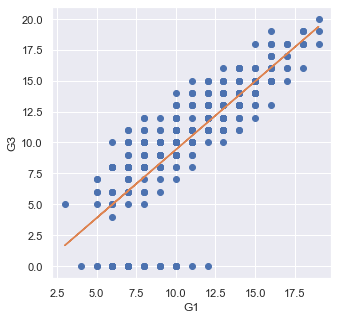

In [22]:
# 課題4-5
scatterplot(df)  # 課題4-2で作成した自作関数を呼び出して散布図をプロット
plt.plot(X, reg.predict(X))  # 課題4-4の結果を用いて回帰直線を引く

### 課題5 質的 vs 量的データ（箱ひげ図）

以下は，isfar を横軸，G3 を縦軸とするような箱ひげ図をプロットするコードである．
このコードを参考に，以下の課題を行う．

課題5-1. homestudy を横軸，G3 を縦軸とするような箱ひげ図をプロットせよ．

課題5-2. studytime を横軸，G3 を縦軸とするような箱ひげ図をプロットせよ．

is far  の mean = 9.129,	median = 10.000
not far の mean = 10.525,	median = 11.000


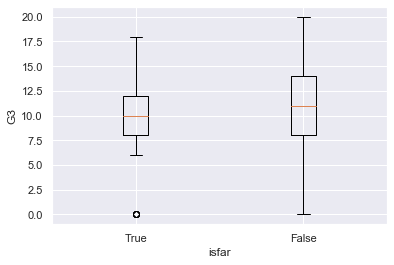

In [23]:
# 参考コード
x1 = df.loc[df['isfar']==True, 'G3']  # 列'G3'にてisfar が True の行だけ取り出す
x2 = df.loc[df['isfar']==False, 'G3']  # 列'G3'にてisfar が False の行だけ取り出す
# 次の書き方はchained indexing といって推奨されない 
# df['G3'][df['isfar']==True]
# df['G3'][df['isfar']==False]
# https://note.nkmk.me/python-pandas-index-row-column/

plt.boxplot([x1, x2], labels=['True', 'False'])
plt.xlabel('isfar')
plt.ylabel('G3')
# それぞれのグループの平均と中央値
print('is far  の mean = {:.3f},\tmedian = {:.3f}'.format(x1.mean(), x1.median()))
print('not far の mean = {:.3f},\tmedian = {:.3f}'.format(x2.mean(), x2.median()))

Text(0, 0.5, 'G3')

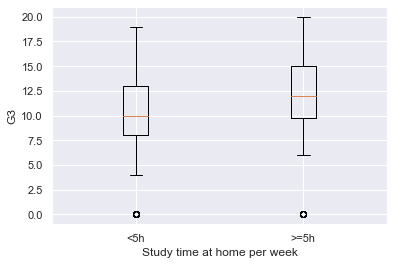

In [24]:
# 課題5-1
x1 = df.loc[df['homestudy']==False, 'G3']  # 列'G3'にて homestudy が False の行を取り出す
x2 = df.loc[df['homestudy']==True, 'G3']  # 列'G3'にて homestudy が True の行を取り出す
plt.boxplot([x1, x2], labels=['<5h', '>=5h'])  # 左が5時間未満，右が5時間以上
plt.xlabel('Study time at home per week')
plt.ylabel('G3')

Text(0, 0.5, 'G3')

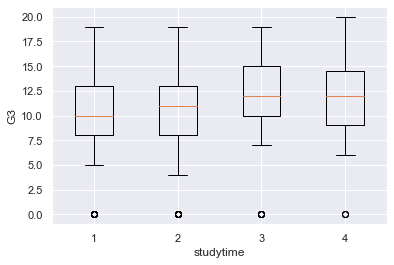

In [25]:
# 課題5-2

studytime_levels = [1, 2, 3, 4]  # list(range(1, 5)) でもよい

# df.loc[df['studytime']==i, 'G3']  (i=1,2,3,4) を要素とするリスト x1_4 を用意し，boxplotの第一引数に渡す
# 内包表記を使ってもよい
x1_4 = [df.loc[df['studytime']==i, 'G3'] for i in studytime_levels]

plt.boxplot(x1_4, labels=[str(i) for i in studytime_levels])
plt.xlabel('studytime')
plt.ylabel('G3')

**（参考）以下も実行してみてください**

「うーん，Rよりややこしいなあ，いちいちデータをグループに分けないといけないのか～」と思われるかもしれませんが，seaborn という可視化ライブラリを使うともっと簡単に（しかもいい感じに）プロットできます．

`import seaborn as sns` のようにモジュールをインポートしておく必要がありますが，これは実は今回の最初の方で既に行っています．

使い方は R の `boxplot(y ~ x, data=df)` っぽい感じです．`x` と `y` も明示的に指定するので，xとyの順序を間違える心配もないですね．

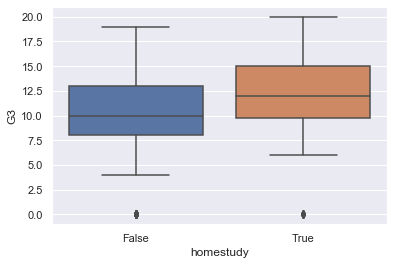

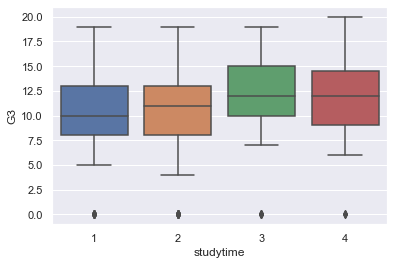

In [26]:
# 参考
sns.boxplot(x='homestudy', y='G3', data=df)
plt.show()  # 重ならないようにいったん描画
sns.boxplot(x='studytime', y='G3', data=df)

（参考2）実は，pandas の DataFrame にも boxplot があります．

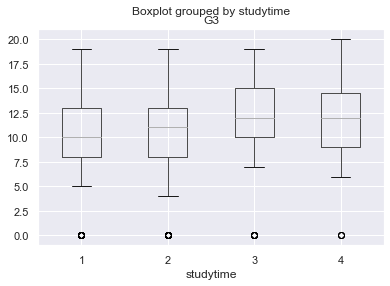

In [27]:
df.boxplot('G3', 'studytime')  # df.boxplot(by='studytime', column='G3') のように なんとか= を明記すると順序変えてもよい

以上で今回の演習は終わりです．今回はほとんど記述統計でしたが，Rのときのように推測統計（検定や推定）を行うには，`scipy.stats` が使えますし，さらに `statmodels` というのも使うと，かなりRっぽいことができるようになります．必要な時にまた調べてみてください．

boxplot の例のように，Python も R も，同じことをするのに複数の書き方があることが多いです．実際には好みや実行環境の制約などもあるので，自分に合った方法を見つけていきましょう．なお，この演習ではできるだけ基本的な方法を使うようにしています（可視化も `matplotlib` を使うなど）．まずは基本を試しておきましょう．